### Lookup tables

A **lookup table** is a method for using pre-computed values to speed up the evaluation of a quantity. 

The idea is simple: we evaluate a function $f(x_i)$ for a set of values $x_i$ and store the results $(x_i,f(x_i))$ in a pair of arrays or in a file. Then, to calculate $f(x)$ for some general value, we find two values $[x_i, x_{i+1}]$ that bracket $x$, and interpolate between $f(x_i)$ and $f(x_{i+1})$ to get an estimate for $f(x)$. The accuracy of the result will depend on the order of the interpolation. 

Here we illustrate this idea, starting with linear interpolation.


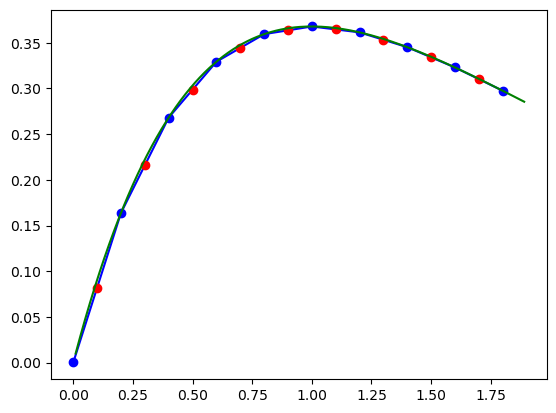

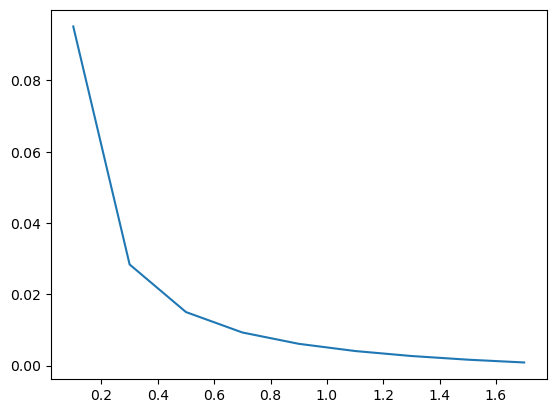

In [1]:
from numpy import exp, arange, zeros
from pylab import plot, show

# take a simple function as an example
def f_of_x(x):
        return x*exp(-x)

# create the initial arrays for the lookup table
# pre-calculated table
xv = arange(0.0001,1.9,0.2)
yv = f_of_x(xv)

def lookup(x,xv,yv):
# performs a linear interpolation on values yv = f(xv), for a value x
# assumes xv is an array of x values, sorted in increasing order
    N = len(xv)

    # check x is in the range [xv[0],xv[N-1]] 
    if x < xv[0]:
        print("error: x < xv[0]")
        return -1
    if x > xv[N-1]:
        print("error: x > xv[N-1]")
        return -1
    # assuming it is, find the index i of the element below it 
    i = 0
    while xv[i+1] < x: #(i.e. while the next point in xv is less than x) 
        i += 1
        #at the end of this loop, x[i+1] is bigger than xv while x[i] is less than xv

    # calculate interpolation weights for upper and lower values
    wl = (xv[i+1] - x)/(xv[i+1]-xv[i])
    wu = (x - xv[i])/(xv[i+1]-xv[i])

    # return weighted average
    y = wl*yv[i] + wu*yv[i+1]
    return(y)

# to test this, plot the initially calculated points
plot(xv,yv,"bo")
plot(xv,yv,"b-")


# now interpolate some points and plot them
nx = arange(0.1,1.8,0.2)
N2 = len(nx)
nyx = zeros(N2)
for i in range(N2):
    nyx[i] = lookup(nx[i],xv,yv)
# plot interpolated points in red
plot(nx,nyx,"ro")

# finally, plot in green better-sampled version of the function
# to check accuracy
xh = arange(0.01,1.9,0.01)
yh = f_of_x(xh)

plot(xh,yh,"g-")
show()

#plot the relative accuracy at each interpolated point
from numpy import abs
fnx = f_of_x(nx)
ex = abs(fnx-nyx)/fnx
plot(nx,ex)
show()

**1)** Edit this code to decrease the spacing of the precalculated samples by factors of 3, 9, 27 and 81, while keeping the five points at which to calculate interpolated values the same. *hint: you might want to figure out what value corresponds to the sample spacing in the code above, and replace it with a variable whose value you can reassign; then you could generate 5 different arrays of precomputed values, one for each spacing*

Mean average for spacing 0.2 : 0.018150425149632207
Mean average for spacing 0.06666666666666667 : 0.0020133022712594904
Mean average for spacing 0.022222222222222223 : 0.0002236422505874161
Mean average for spacing 0.007407407407407408 : 2.483251854757923e-05
Mean average for spacing 0.0024691358024691358 : 2.7430591725480203e-06


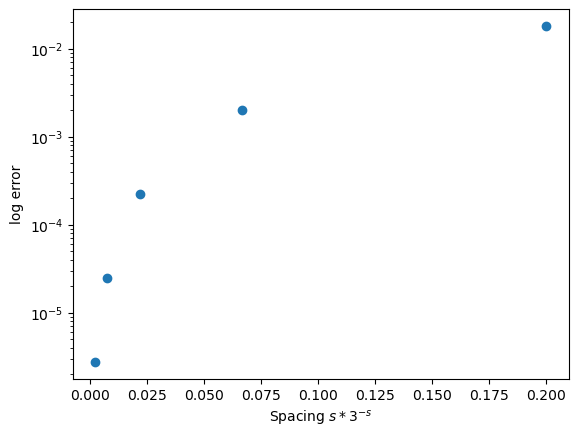

In [2]:
from numpy import exp, arange, zeros
import numpy as np
from pylab import plot, show
import matplotlib.pyplot as plt

def lookup_1(x,xv,yv):
# performs a linear interpolation on values yv = f(xv), for a value x
# assumes xv is an array of x values, sorted in increasing order
    N = len(xv)

    # check x is in the range [xv[0],xv[N-1]] 
    if x < xv[0]:
        print("error: x < xv[0]")
        return -1
    if x > xv[N-1]:
        print("error: x > xv[N-1]")
        return -1
    # assuming it is, find the index i of the element below it 
    i = 0
    while xv[i+1] < x: #(i.e. while the next point in xv is less than x) 
        i += 1
        #at the end of this loop, x[i+1] is bigger than xv while x[i] is less than xv

    # calculate interpolation weights for upper and lower values
    wl = (xv[i+1] - x)/(xv[i+1]-xv[i])
    wu = (x - xv[i])/(xv[i+1]-xv[i])

    # return weighted average
    y = wl*yv[i] + wu*yv[i+1]
    return(y)

# create the initial arrays for the spacing and errors
spacings = np.zeros(5)
erros = np.zeros(5)

# use loop to get muti-spacing with the error
for s in range(5):
    size = 0.2
    modified_size = size/3**s
    xv = arange(0.0001,1.9,modified_size)
    yv = f_of_x(xv)
    nx = arange(0.1,1.8,0.2)
    N2 = len(nx)
    nyx = zeros(N2)
    for i in range(N2):
        nyx[i] = lookup_1(nx[i],xv,yv)
    fnx = f_of_x(nx)
    ex = abs(fnx-nyx)/fnx
    print("Mean average for spacing",modified_size,":",np.sum(ex)/(ex.shape[0]))
    spacings[s] = modified_size
    erros[s] = np.sum(ex)/(ex.shape[0])

# plot the graph
plt.scatter(spacings,erros)
plt.xlabel(r'Spacing $s*3^{-s}$')
plt.ylabel('log error')
plt.yscale("log")
show()

**2)** Given these versions, determine the average relative accuracy of the interpolation, as a function of the sample spacing. The average relative accuracy here can be taken to be:

$$\epsilon = {1 \over N}\sum_i {|r_i - I_i|\over|r_i|} \,,$$        
where $N = 9$ is the total number of interpolated values $I_i$, and $r_i$ are the corresponding real values.

2.7430591725480207e-06


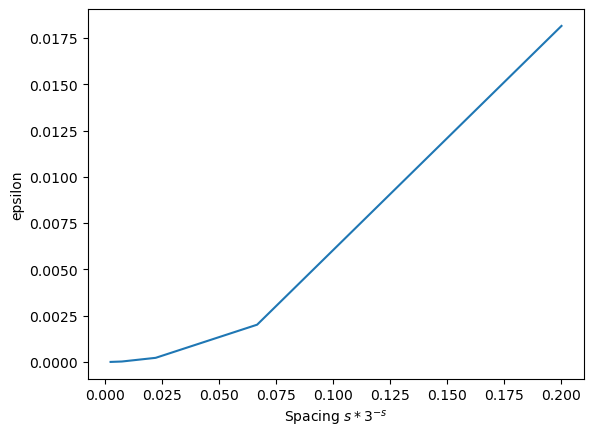

In [3]:
## fixed spacing
nx = arange(0.1,1.8,0.2)
N2 = len(nx)
diff = zeros(N2)
for i in range(N2):
    r = f_of_x(nx[i])
    I = lookup(nx[i],xv,yv)
    diff[i] = abs(r - I)/abs(r)
epsilon = 1/9*sum(diff)
print(epsilon)

## muti-sample spacing
spacings = np.zeros(5)
relative_accuracy = np.zeros(5)
for s in range(5):
    size = 0.2
    modified_size = size/3**s
    xv = arange(0.0001,1.9,modified_size)
    yv = f_of_x(xv)
    nx = arange(0.1,1.8,0.2)
    N2 = len(nx)
    diff = zeros(N2)
    for i in range(N2):
        r = f_of_x(nx[i])
        I = lookup(nx[i],xv,yv)
        diff[i] = abs(r - I)/abs(r)
    spacings[s] = modified_size
    relative_accuracy[s] = 1/9*sum(diff)

# plot the graph
plt.plot(spacings,relative_accuracy)
plt.xlabel(r'Spacing $s*3^{-s}$')
plt.ylabel('epsilon')
show()

**3)** Now rewrite the code to use **cubic** interpolation. This will require sets of 4 pre-computed points around each point where you wish to interpolate; you can write the interpolating function as a sum over basis functions, as explained in the course notes. Remember to skip points if they are too close to the edges; This means you won't be able to sample the first and last intervals.

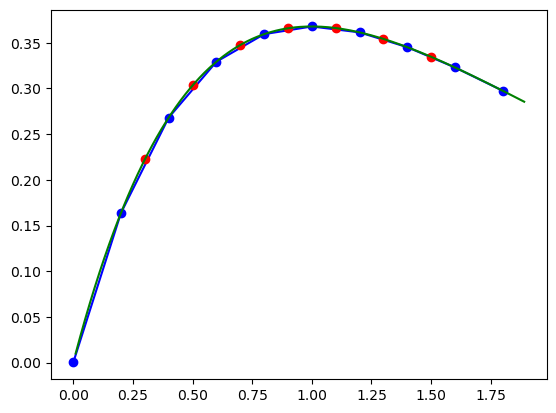

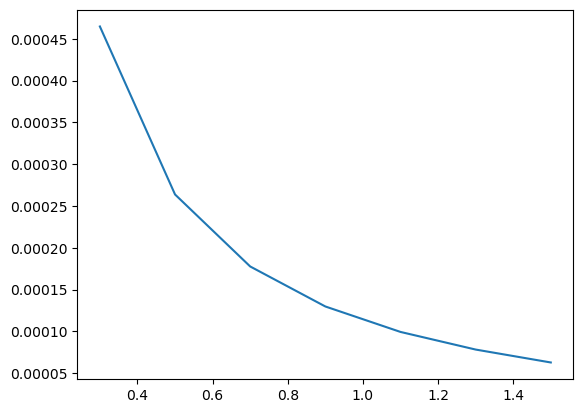

In [4]:
# create the initial arrays for the lookup table
# pre-calculated table
xv_cubic = arange(0.0001,1.9,0.2)
yv_cubic = f_of_x(xv_cubic)

def lookup_cubic(x,xv,yv):
# performs a linear interpolation on values yv = f(xv), for a value x
# assumes xv is an array of x values, sorted in increasing order
    N = len(xv)

    # check x is in the range [xv[0],xv[N-1]] 
    if x < xv[0]:
        print("error: x < xv[0]")
        return -1
    if x > xv[N-1]:
        print("error: x > xv[N-1]")
        return -1
    # assuming it is, find the index i of the element below it 
    i = 0
    while xv[i+1] < x: #(i.e. while the next point in xv is less than x) 
        i += 1
        #at the end of this loop, x[i+1] is bigger than xv while x[i] is less than xv
    x1 = xv[i-1]
    x2 = xv[i]
    x3 = xv[i+1]
    x4 = xv[i+2]
    w1 = (x-x2)*(x-x3)*(x-x4)/(x1-x2)/(x1-x3)/(x1-x4)
    w2 = (x-x1)*(x-x3)*(x-x4)/(x2-x1)/(x2-x3)/(x2-x4)
    w3 = (x-x1)*(x-x2)*(x-x4)/(x3-x1)/(x3-x2)/(x3-x4)
    w4 = (x-x1)*(x-x2)*(x-x3)/(x4-x1)/(x4-x2)/(x4-x3)
    y = w1*yv[i-1] + w2*yv[i] + w3*yv[i+1] + w4*yv[i+2]
    return y

# to test this, plot the initially calculated points
plot(xv_cubic,yv_cubic,"bo")
plot(xv_cubic,yv_cubic,"b-")


# now interpolate some points and plot them
nx_cubic = arange(0.1,1.8,0.2)
# remove the edge values
nx_cubic = nx_cubic[1:-1]
N2_cubic = len(nx_cubic)
nyx_cubic = zeros(N2_cubic)
for i in range(N2_cubic):
    nyx_cubic[i] = lookup_cubic(nx_cubic[i],xv_cubic,yv_cubic)
# plot interpolated points in red
plot(nx_cubic,nyx_cubic,"ro")

# finally, plot in green better-sampled version of the function
# to check accuracy
xh_cubic = arange(0.01,1.9,0.01)
yh_cubic = f_of_x(xh_cubic)

plot(xh_cubic,yh_cubic,"g-")
show()

#plot the relative accuracy at each interpolated point
from numpy import abs
fnx_cubic = f_of_x(nx_cubic)
ex_cubic = abs(fnx_cubic-nyx_cubic)/fnx_cubic
plot(nx_cubic,ex_cubic)
show()

**4)** Study how the error decreases, as above, for decreasing spacing of the pre-computed points.

Mean average for spacing 0.2 : 0.2223640966625275
Mean average for spacing 0.06666666666666667 : 0.22222396544588474
Mean average for spacing 0.022222222222222223 : 0.22222224373042476
Mean average for spacing 0.007407407407407408 : 0.22222222248754886
Mean average for spacing 0.0024691358024691358 : 0.2222222222254766


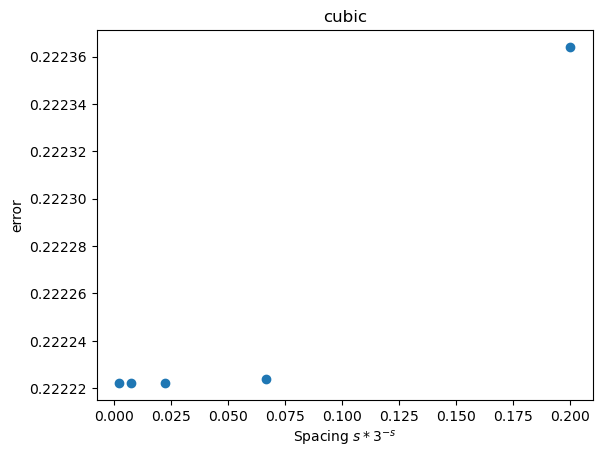

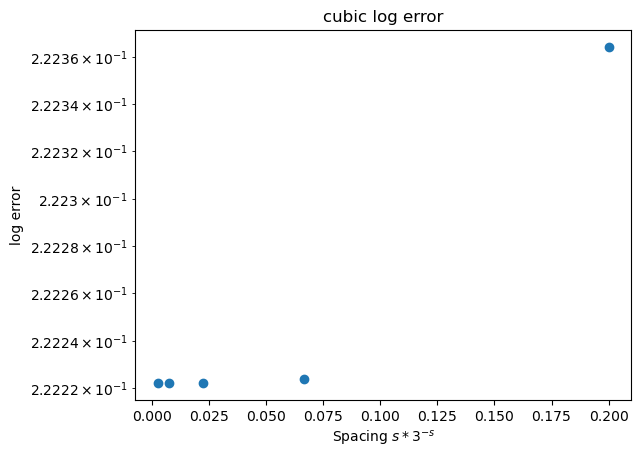

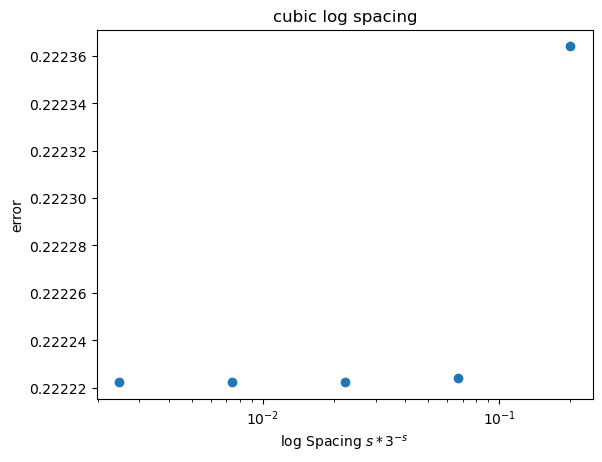

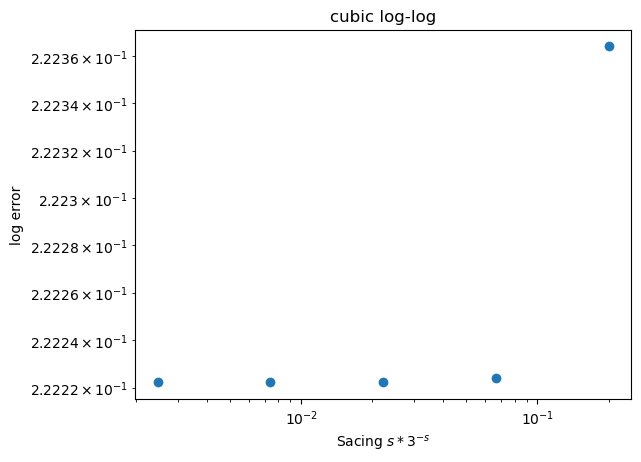

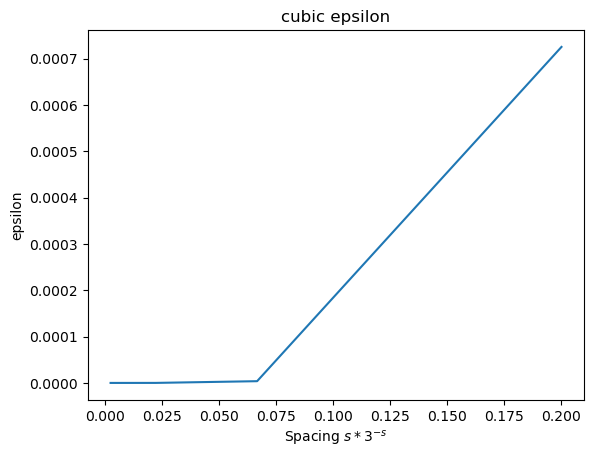

In [5]:
## muti-sample spacing for cubic
spacings_cubic = np.zeros(5)
erros_cubic = np.zeros(5)
for s in range(5):
    size = 0.2
    modified_size = size/3**s
    xv = arange(0.0001,1.9,modified_size)
    yv = f_of_x(xv)
    nx = arange(0.1,1.8,0.2)
    N2 = len(nx)
    nyx = zeros(N2)
    for i in range(1,N2-1):
        nyx[i] = lookup_cubic(nx[i],xv,yv)
    fnx = f_of_x(nx)
    ex = abs(fnx-nyx)/fnx
    print("Mean average for spacing",modified_size,":",np.sum(ex)/(ex.shape[0]))
    spacings_cubic[s] = modified_size
    erros_cubic[s] = np.sum(ex)/(ex.shape[0])

# plot orginal
plt.scatter(spacings_cubic,erros_cubic)
plt.title('cubic')
plt.xlabel(r'Spacing $s*3^{-s}$')
plt.ylabel('error')
show()
# plot log error
plt.scatter(spacings_cubic,erros_cubic)
plt.title('cubic log error')
plt.xlabel(r'Spacing $s*3^{-s}$')
plt.ylabel('log error')
plt.yscale("log")
show()
# plot log spacing
plt.scatter(spacings_cubic,erros_cubic)
plt.title('cubic log spacing')
plt.xlabel(r'log Spacing $s*3^{-s}$')
plt.ylabel('error')
plt.xscale("log")
show()
# plot log both error and spacing
plt.scatter(spacings_cubic,erros_cubic)
plt.title('cubic log-log')
plt.xlabel(r'Sacing $s*3^{-s}$')
plt.ylabel('log error')
plt.xscale("log")
plt.yscale("log")
show()

# It shows error decrease dramaticaly. It cannot bedecribe by mathmatical relation easily
# However the graph indecates the error decrease with smaller spacing
# the graph looks like the error is exponentially decreasing with decrease spacing

## muti-sample spacing epsilon
spacings = np.zeros(5)
relative_accuracy = np.zeros(5)
for s in range(5):
    # basic size
    size = 0.2
    
    # modified size
    modified_size = size/3**s
    
    # create the initial arrays for the lookup table
    # pre-calculated table
    xv = arange(0.0001,1.9,modified_size)
    yv = f_of_x(xv)
    
    # create the initial arrays for actural x
    nx = arange(0.1,1.8,0.2)
    N2 = len(nx)
    
    # initial the array for series of \r-I\/\r\
    diff = zeros(N2)
    
    # add the value to arrays
    for i in range(N2-1):
        r = f_of_x(nx[i])
        I = lookup_cubic(nx[i],xv,yv)
        diff[i] = abs(r - I)/abs(r)
    spacings[s] = modified_size
    relative_accuracy[s] = 1/9*sum(diff)

# plot the graph
plt.plot(spacings,relative_accuracy)
plt.title('cubic epsilon')
plt.xlabel(r'Spacing $s*3^{-s}$')
plt.ylabel('epsilon')
show()

# The average relative accuracy of the interpolation shows similar to
# error graph epsilon value decrease dramaticaly seems like exponentially decreasing with decrease spacing

**5)** Finally, if all that worked and you're really doing well for time, you can save the values of the spacing and the errors in lists as you go, and plot log(abs(error)) versus log(spacing) for linear and cubic interpolation on a single plot.

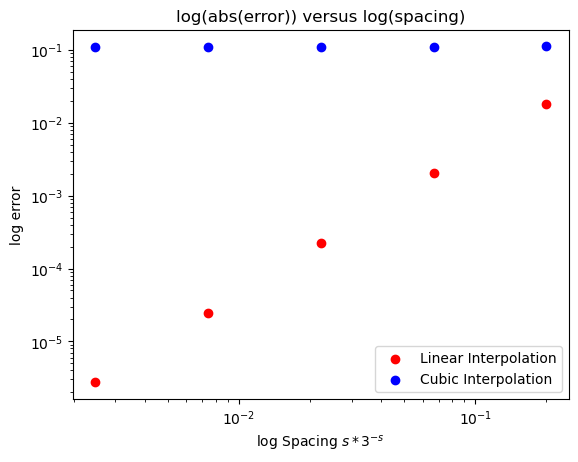

In [6]:
# create the initial arrays for the spacing and errors
spacings = np.zeros(5)
errors_linear = np.zeros(5)
errors_cubic = np.zeros(5)

# use loop to get muti-spacing with the error
for s in range(5):
    # basic size
    size = 0.2
    
    # modified size
    modified_size = size/3**s
    
    # create the initial arrays for the lookup table
    # pre-calculated table
    xv = arange(0.0001,1.9,modified_size)
    yv = f_of_x(xv)
    
    # create the initial arrays for actural x
    nx = arange(0.1,1.8,0.2)
    
    # create the initial arrays for actural y
    fnx = f_of_x(nx)
    N2 = len(nx)
    
    # create the initial arrays for actural y interpolation
    nyx_linear = zeros(N2)
    nyx_cubic = zeros(N2)
    
    # add the value to linear interpolation
    for i in range(N2):
        nyx_linear[i] = lookup(nx[i],xv,yv)
    ex_linear = abs(fnx-nyx_linear)/fnx
    
    # add the value to cubic interpolation
    for i in range(N2-1):
        nyx_cubic[i] = lookup_cubic(nx[i],xv,yv)
    ex_cubic = abs(fnx-nyx_cubic)/fnx
    
    # add the value to the spacing
    spacings[s] = modified_size
    
    # add the values to errors
    errors_linear[s] = abs(np.sum(ex_linear)/(ex_linear.shape[0]))
    errors_cubic[s] = abs(np.sum(ex_cubic)/(ex_cubic.shape[0]))

# plot the dot diagram
plt.title('log(abs(error)) versus log(spacing)')
plt.scatter(spacings,errors_linear,c='r',label='Linear Interpolation')
plt.scatter(spacings,errors_cubic,c='b',label='Cubic Interpolation')
plt.xlabel(r'log Spacing $s*3^{-s}$')
plt.ylabel('log error')
# take the log-log
plt.xscale("log")
plt.yscale("log")
plt.legend()
show()